# Objective

> ###  Build a model to predict the customers who are about to leave the company. With the help of this model the compay can controll their customer attrition rate

### Download the data from here

link : 'https://www.kaggle.com/radmirzosimov/telecom-users-dataset'

# Available Details

> customerID - customer id 

> gender - client gender (male / female)

> SeniorCitizen - whether the client is a pensioner (1, 0)

> Partner - whether the client is married (Yes, No)

> Dependents - does the client have dependents (Yes, No)

> tenure - how many months a person has been a client of the company

> PhoneService - is the telephone service activated (Yes, No)

> MultipleLines - whether multiple telephone lines are connected (Yes, No, No phone service)

> InternetService - client's Internet provider (DSL, Fiber optic, No)

> OnlineSecurity - is the online security service enabled (Yes, No, No internet service)

> OnlineBackup - is the online backup service activated (Yes, No, No internet service)

> DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

> TechSupport - is the technical support service activated (Yes, No, No internet service)

> StreamingTV - is the streaming TV service activated (Yes, No, No internet service)

> StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
 
> Contract - type of customer contract (Month-to-month, One year, Two year)

> PaperlessBilling - whether the client uses paperless billing (Yes, No)


> PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

> MonthlyCharges - current monthly payment

> TotalCharges - the total amount that the client has paid for the services for the entire time

> Churn - whether there was a churn (Yes or No)

In [4]:
import numpy as np
import pandas as pd

# Import data

In [6]:
data = pd.read_csv(r'C:\Users\Vishnu\Desktop\jupyter Projects\Projects\Telecom\telecom_users.csv')

# Exploratory Data Analysis

In [7]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
columns=list(data.columns)
print(f"there are totally {len(columns)} Features") 

there are totally 22 Features


# Out of 22, 2 features are not important so i am droping those

In [9]:
data.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

### Checking whether there is any missing values

In [10]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### First we need to change the data types. because if we have object datatype, then we will not be able to find out missing values properly

In [11]:
# Splitting the data into numerical and categorical data

categorical = data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
numerical = data.drop(categorical.columns,axis=1)

In [12]:
# Converting Object into categorical feature
categorical=categorical.astype('category')

# Converting Object into numerical feature
# numerical=pd.to_numeric(numerical.TotalCharges)

1. We are getting this error :: " ValueError: Unable to parse string " " at position 356"
2. Which means there are some missing values in the form of strings. and we need to fix it

In [13]:
# Changing the object to categorical features
numerical.TotalCharges=numerical.TotalCharges.astype('category')

# Finding the index of missing value
missing_index1=np.where(numerical.TotalCharges==' ')

# Filling it with Nan value
numerical.TotalCharges.iloc[missing_index1]=np.nan

# Converting it into float
numerical=numerical.astype('float')

numerical.TotalCharges.isnull().sum()

10

In [14]:
missing_index1

(array([ 356,  634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951],
       dtype=int64),)

### There are totally 10 missing values in TotalCharges column

In [15]:
# Concatinating categorical and numerical data

new_data = pd.concat([categorical,numerical],axis=1)

In [16]:
new_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
tenure               0
MonthlyCharges       0
TotalCharges        10
dtype: int64

### Importing required libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr,pearsonr

# Let's try to create new variables using tenure, Total charge and monthly charge

#### Feature 1: monthly_times_totalcharge

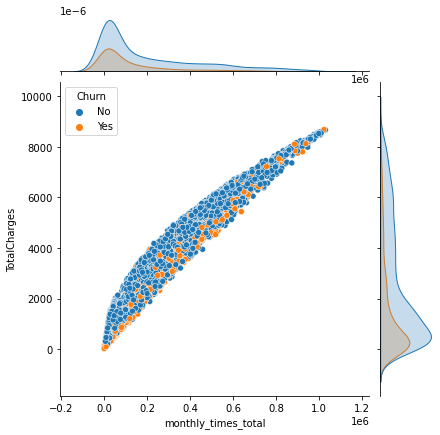

In [18]:
monthly_times_total=pd.Series(new_data.MonthlyCharges*new_data.TotalCharges,name="monthly_times_total")

sns.jointplot(x=monthly_times_total,y=new_data.TotalCharges,hue=new_data.Churn)

### 1.Seems to be correlated with each other

#### taking square root

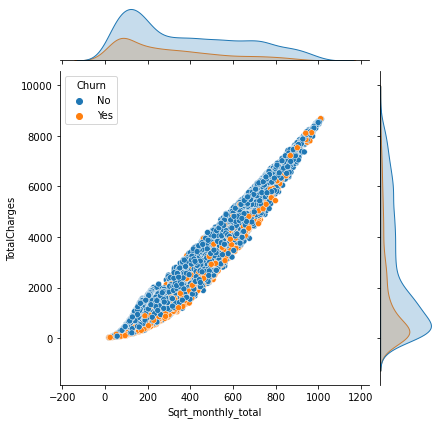

In [19]:
Sqrt_monthly_total=pd.Series(np.sqrt(new_data.MonthlyCharges*new_data.TotalCharges),name='Sqrt_monthly_total')
sns.jointplot(x=Sqrt_monthly_total,y=new_data.TotalCharges,hue=new_data.Churn)

### 1. seems to be the mirror image of the previoue one

### Adding tenure and monthly charge

In [20]:
monthly_plus_tenure = pd.Series(new_data.MonthlyCharges+new_data.tenure,name="monthly_plus_tenure")

<Figure size 1440x720 with 0 Axes>

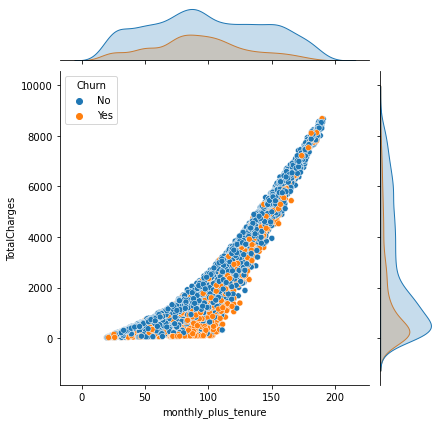

In [21]:
fig = plt.figure(figsize=(20,10))
sns.jointplot(x=monthly_plus_tenure,y=new_data.TotalCharges,data=new_data,hue=new_data.Churn)

### we can see that there is a linear relation between monthly_tenure and Total charge

### Multiplying Monthly charge and tenure

In [22]:
monthly_times_tenure=pd.Series(new_data.MonthlyCharges*new_data.tenure,name="monthly_times_tenure")

<Figure size 1440x720 with 0 Axes>

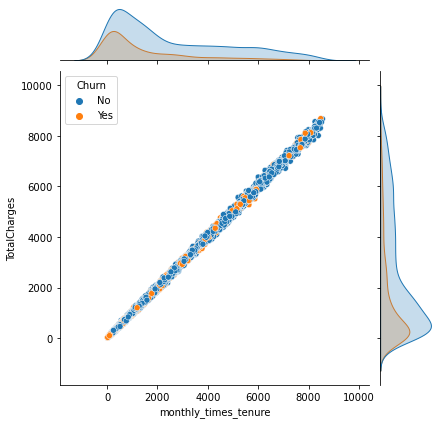

In [23]:
fig = plt.figure(figsize=(20,10))
sns.jointplot(x=monthly_times_tenure,y=new_data.TotalCharges,data=new_data,hue=new_data.Churn)

### As we can see there is a absolute positive correlation between monthly_times_tenure and Total charge

# Adding new features to the data

In [24]:
new_data=pd.concat([new_data,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure],axis=1)

### How each of them are correlated 

<AxesSubplot:>

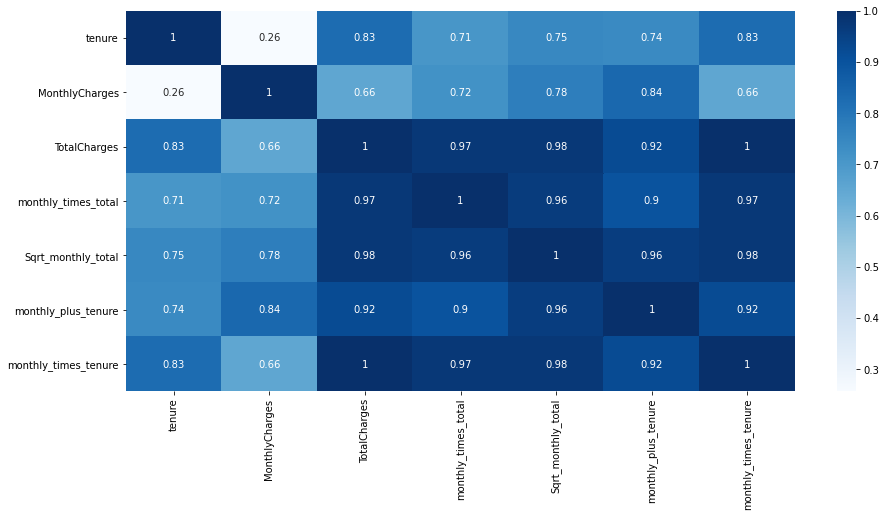

In [25]:
correlation=new_data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(correlation,cmap='Blues',annot=True)

### As we can see Monthly_times_tennure is highly correlated with Total Charge so we can use this feature to fill missing values in Total charge

In [26]:
new_data.iloc[missing_index1]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure
356,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,...,Yes,Bank transfer (automatic),No,0.0,61.90,NaN,NaN,NaN,61.90,0.0
634,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,...,No,Credit card (automatic),No,0.0,56.05,NaN,NaN,NaN,56.05,0.0
2771,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No,Mailed check,No,0.0,25.35,NaN,NaN,NaN,25.35,0.0
3086,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,Yes,Mailed check,No,0.0,19.70,NaN,NaN,NaN,19.70,0.0
3255,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No,Mailed check,No,0.0,19.85,NaN,NaN,NaN,19.85,0.0
4326,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,...,No,Mailed check,No,0.0,80.85,NaN,NaN,NaN,80.85,0.0
5375,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No,Mailed check,No,0.0,20.25,NaN,NaN,NaN,20.25,0.0
5382,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No,Mailed check,No,0.0,20.00,NaN,NaN,NaN,20.00,0.0
5695,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,...,Yes,Bank transfer (automatic),No,0.0,52.55,NaN,NaN,NaN,52.55,0.0
5951,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No,Mailed check,No,0.0,25.75,NaN,NaN,NaN,25.75,0.0


### Unfortunatly we have zeros in tennure column. so i am going to drop these 10 data points.
### Reason for droping these data points
       1. We do not have tenure information for these data points
       2. More over already we have enough data points in No Churn class so we can drop these data points

### Droping the nan values

In [27]:
new_data.dropna(inplace=True)

# Exploring each and Every individual features

<AxesSubplot:xlabel='Churn', ylabel='count'>

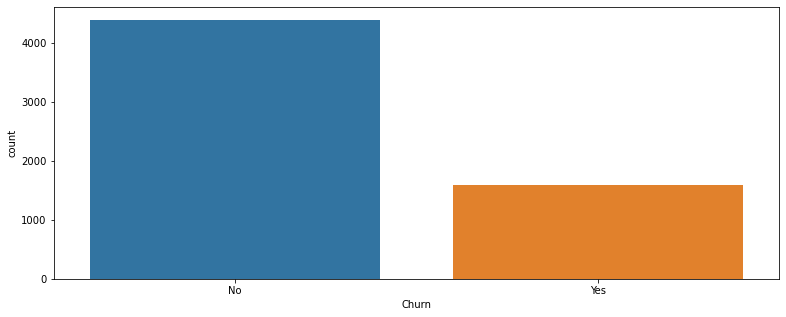

In [28]:
# Checking whether or not the data is balanced.
fig = plt.figure(figsize=(13,5))
sns.countplot(data=new_data,x='Churn')

  
   ### The data is imbalanced

### Dstribution of Numerical dataset

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'monthly_times_total',
       'Sqrt_monthly_total', 'monthly_plus_tenure', 'monthly_times_tenure'],
      dtype='object')


<AxesSubplot:xlabel='TotalCharges'>

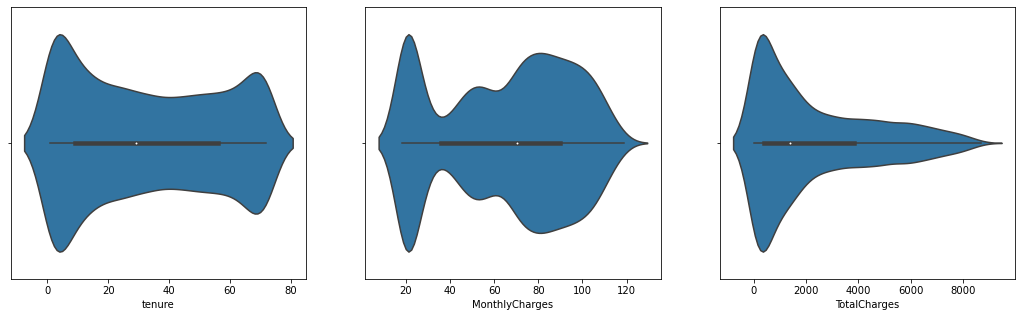

In [29]:
numerical_col = new_data.columns[(new_data.dtypes!='category')]
fig,axes = plt.subplots(1,3,figsize=(18,5))
print(numerical_col)
sns.violinplot(ax=axes[0],x=new_data[numerical_col[0]])
sns.violinplot(ax=axes[1],x=new_data[numerical_col[1]])
sns.violinplot(ax=axes[2],x=new_data[numerical_col[2]])

### To get overall idea about how numerical features are usefull in finding patterns, let's use pair plot

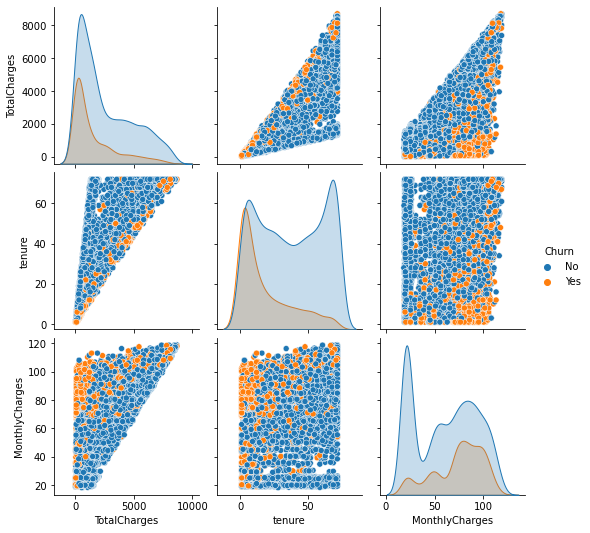

In [30]:
sns.pairplot(data=new_data,vars=['TotalCharges','tenure','MonthlyCharges'],hue='Churn')

# Observations
### 1. Most of the customers leaves within a short period of time 
### 2. Most of the new customers leave the company when they are charged high mothly Charge
### 3. Those who pay high total charge whithin short tenure, tend to leave the company 

# Now let's explore the categorical features

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

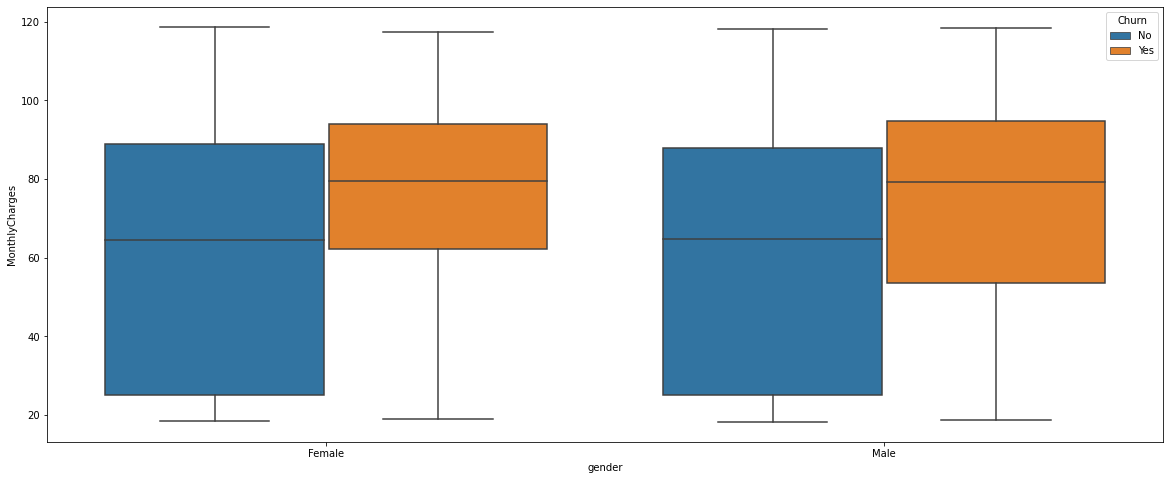

In [31]:
fig = plt.figure(figsize=(20,8))

sns.boxplot(x=new_data.gender,y=new_data.MonthlyCharges,hue=new_data.Churn)

### 1. If the monthly charge is less then the customers are less likely to leave the company
### 2. The churn starts when Monthly charge is greater than 45

<AxesSubplot:xlabel='gender', ylabel='tenure'>

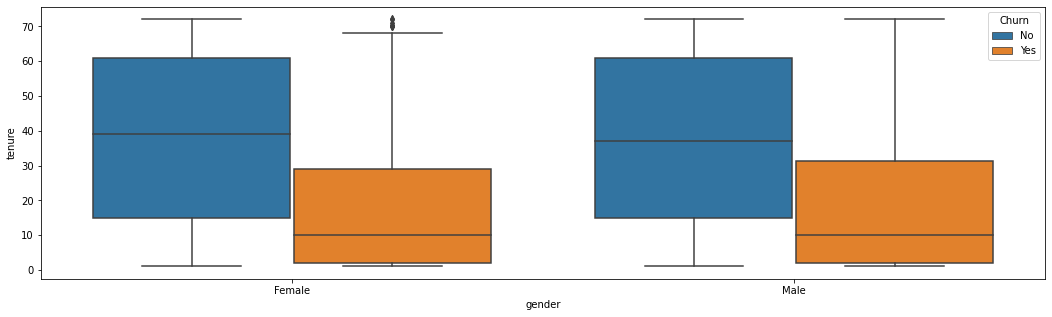

In [32]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.gender,y=new_data.tenure,hue=new_data.Churn)

### Mostly the new customers are more likly to leave the company

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

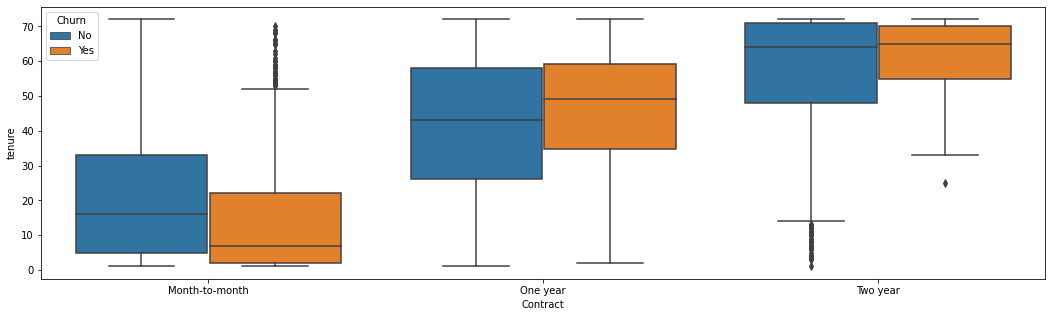

In [33]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.Contract,y=new_data.tenure,hue=new_data.Churn)

<AxesSubplot:xlabel='Contract', ylabel='count'>

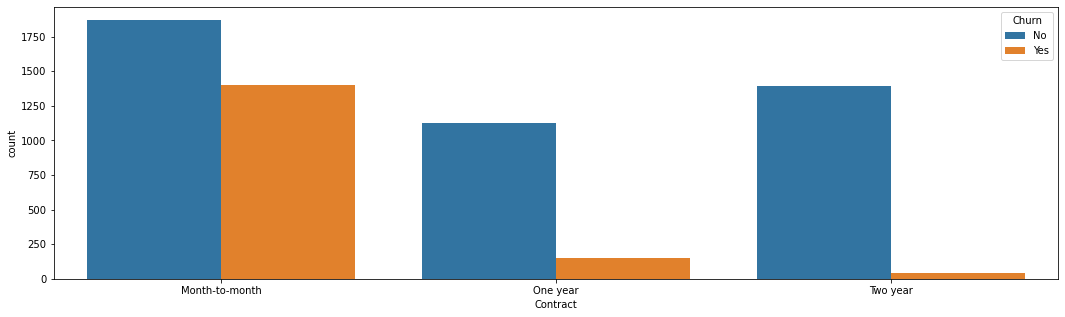

In [34]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.Contract,hue=new_data.Churn)

### People who took month to month contract are more likely to leave the compay than those who have other plans

<AxesSubplot:xlabel='InternetService', ylabel='count'>

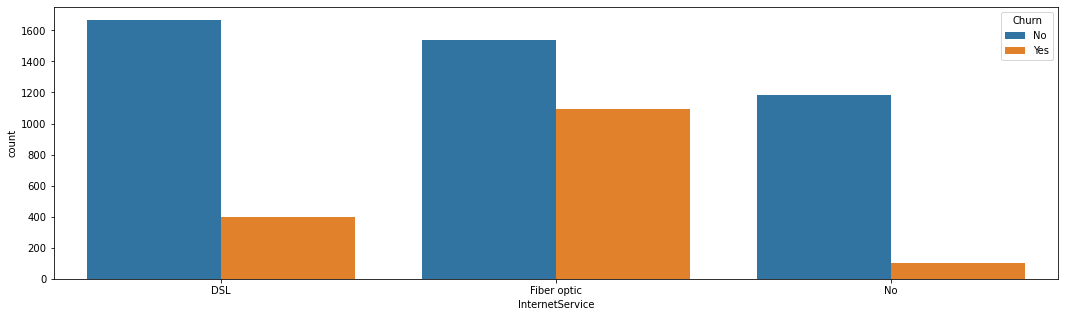

In [36]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.InternetService,hue=new_data.Churn)

### The Customers who use Fiber optic are more likly to have high churn rate compare to other service users

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

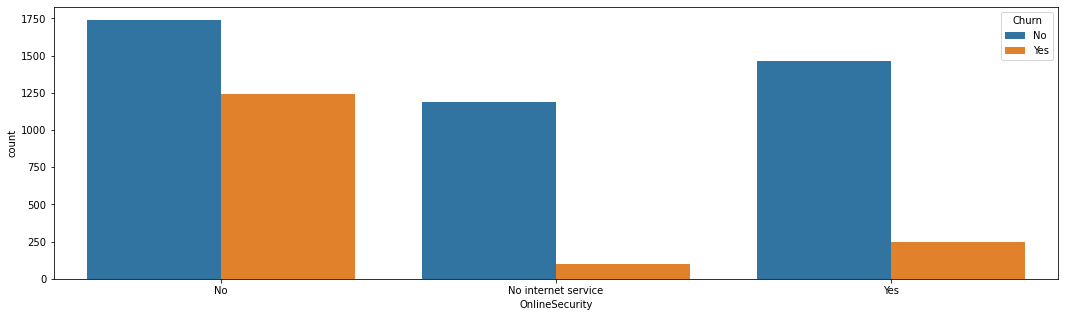

In [37]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.OnlineSecurity,hue=new_data.Churn)

### Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

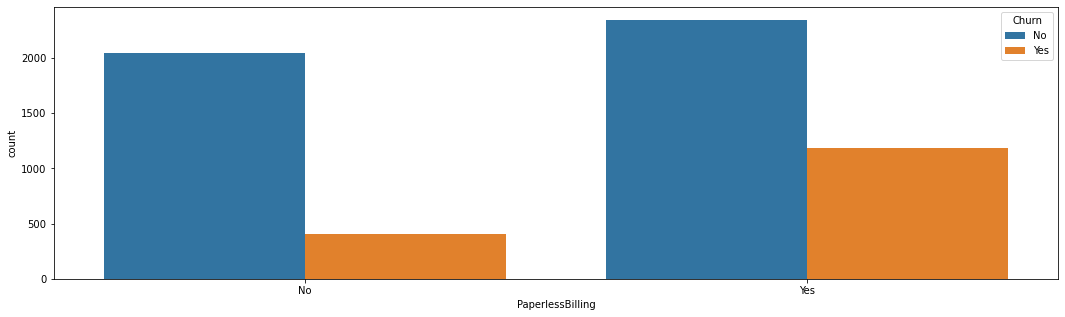

In [38]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaperlessBilling,hue=new_data.Churn)

### Those who pay bill using paperless payment tend to leave the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

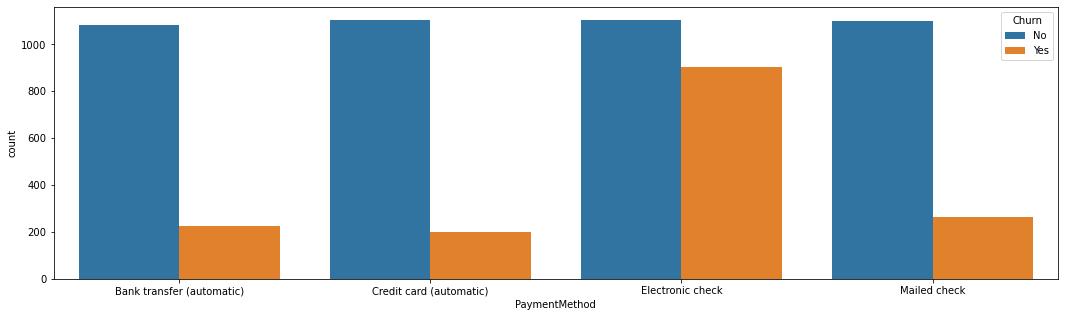

In [39]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

### Those who use electronic check for payment tend to leave the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

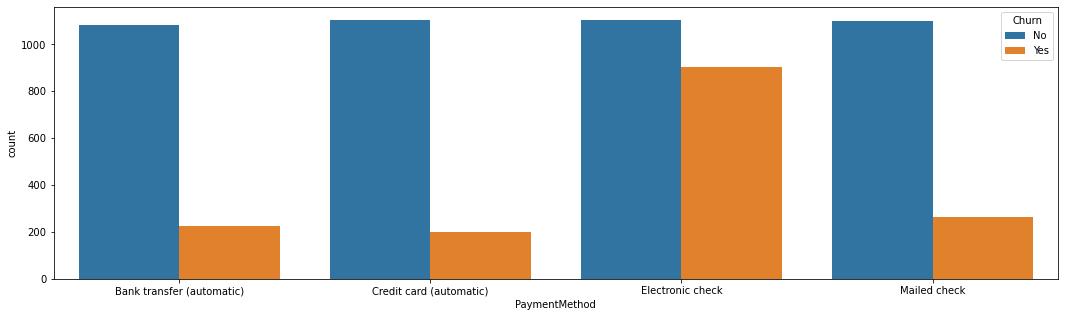

In [40]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

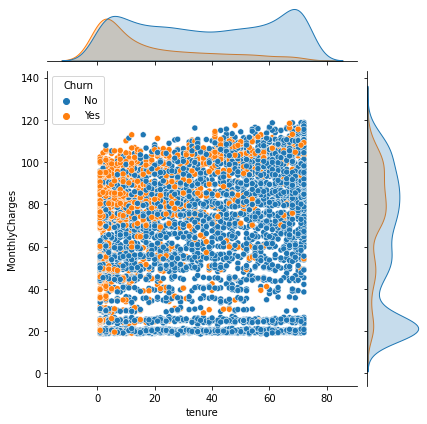

In [41]:
sns.jointplot(x='tenure',y='MonthlyCharges',data=new_data,hue='Churn')

### If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company

<AxesSubplot:xlabel='Partner', ylabel='tenure'>

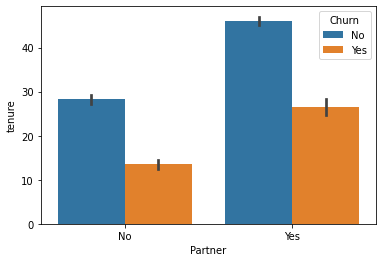

In [42]:
sns.barplot(x='Partner',y='tenure',data=new_data,hue='Churn')

# Finalizing the findings

### 0.Mostly the new customers are more likly to leave the company
### 1.Total Charge is highly correlated tenure and Monthly charge
### 2. Most of the customers leaves within a short period of time 
### 3. Most of the new customers leave the company when they are charged high mothly Charge
### 4. Those who pay high total charge whithin short tenure, tend to leave the company  
### 5. If the monthly charge is less then the customers are less likely to leave the company
### 6. The churn starts when the Monthly charge is greater than 45
### 7.People who took month to month contract are more likely to leave the compay than those who have other plans
### 8.The Customers who use Fiber optic are more likly to have high churn rate compare to other service users
### 9.Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 
### 10.Those who pay bill using paperless payment seem to have high churn rate
### 11.Those who use electronic check for payment tend to leave the company
### 12.If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company
### 13. The data is not balanced

# Building The Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

### Data Preprocessing

In [44]:
new_data.dtypes

gender                  category
SeniorCitizen           category
Partner                 category
Dependents              category
PhoneService            category
MultipleLines           category
InternetService         category
OnlineSecurity          category
OnlineBackup            category
DeviceProtection        category
TechSupport             category
StreamingTV             category
StreamingMovies         category
Contract                category
PaperlessBilling        category
PaymentMethod           category
Churn                   category
tenure                   float64
MonthlyCharges           float64
TotalCharges             float64
monthly_times_total      float64
Sqrt_monthly_total       float64
monthly_plus_tenure      float64
monthly_times_tenure     float64
dtype: object

In [45]:
new_data.SeniorCitizen=new_data.SeniorCitizen.astype('int')
new_data.tenure=new_data.tenure.astype('int')

### If we take dummies for this dataset then we wil not be able to identify the features so let's add all the feature names to theri values

In [46]:
def set_feature_name(X):
    categorical_columns= X.columns[X.dtypes=='category']
    
    for i in categorical_columns:
        X[i]=X[i].apply(lambda m: str(i)+'_'+str(m))
    return X

            
    

In [47]:
set_feature_name(new_data)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure
0,gender_Male,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,...,PaperlessBilling_No,PaymentMethod_Credit card (automatic),Churn_No,72,24.10,1734.65,41805.0650,204.462869,96.10,1735.2
1,gender_Female,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),Churn_No,44,88.15,3973.20,350237.5800,591.808736,132.15,3878.6
2,gender_Female,1,Partner_Yes,Dependents_No,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),Churn_Yes,38,74.95,2869.85,215095.2575,463.783632,112.95,2848.1
3,gender_Male,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,...,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_No,4,55.90,238.50,13332.1500,115.464930,59.90,223.6
4,gender_Male,0,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_Yes,...,PaperlessBilling_No,PaymentMethod_Electronic check,Churn_No,2,53.45,119.50,6387.2750,79.920429,55.45,106.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,gender_Male,0,Partner_Yes,Dependents_No,PhoneService_Yes,MultipleLines_No,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,...,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_Yes,1,95.00,95.00,9025.0000,95.000000,96.00,95.0
5982,gender_Female,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),Churn_No,23,91.10,2198.30,200265.1300,447.509922,114.10,2095.3
5983,gender_Male,0,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,...,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_No,12,21.15,306.05,6472.9575,80.454692,33.15,253.8
5984,gender_Male,1,Partner_No,Dependents_No,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_Yes,...,PaperlessBilling_Yes,PaymentMethod_Electronic check,Churn_Yes,12,99.45,1200.15,119354.9175,345.477810,111.45,1193.4


In [48]:
### Converting categorical features into numerical features

def convert_numerical(X):
    
    categorical_columns= X.columns[X.dtypes=='category']
    
    for i in categorical_columns:
        dummies = pd.get_dummies(X[i],drop_first=True)
        X=pd.concat([X,dummies],axis=1)
        X.drop(i,axis=1,inplace=True)
    return X

In [49]:
final_data=convert_numerical(new_data)

In [50]:
final_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure,gender_Male,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,72,24.10,1734.65,41805.0650,204.462869,96.10,1735.2,1,1,...,0,1,0,0,1,0,1,0,0,0
1,0,44,88.15,3973.20,350237.5800,591.808736,132.15,3878.6,0,0,...,1,0,0,0,0,1,1,0,0,0
2,1,38,74.95,2869.85,215095.2575,463.783632,112.95,2848.1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,4,55.90,238.50,13332.1500,115.464930,59.90,223.6,1,0,...,0,0,1,0,0,1,0,1,0,0
4,0,2,53.45,119.50,6387.2750,79.920429,55.45,106.9,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,95.00,9025.0000,95.000000,96.00,95.0,1,1,...,1,0,1,0,0,1,0,1,0,1
5982,0,23,91.10,2198.30,200265.1300,447.509922,114.10,2095.3,0,1,...,1,0,1,0,1,1,1,0,0,0
5983,0,12,21.15,306.05,6472.9575,80.454692,33.15,253.8,1,1,...,0,1,0,0,0,1,0,1,0,0
5984,1,12,99.45,1200.15,119354.9175,345.477810,111.45,1193.4,1,0,...,1,0,1,0,0,1,0,1,0,1


In [51]:
X=final_data.drop('Churn_Yes',axis=1)
y=final_data['Churn_Yes']

In [52]:
# Handling imbalanced data

over_saample=SMOTE()
X_sample,y_sample = over_saample.fit_resample(X,y)

X_sample=pd.DataFrame(X_sample,columns=X.columns)

In [53]:
X_sample

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,monthly_times_total,Sqrt_monthly_total,monthly_plus_tenure,monthly_times_tenure,gender_Male,Partner_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.100000,1734.650000,41805.065000,204.462869,96.100000,1735.200000,1,1,...,1,0,1,0,0,1,0,1,0,0
1,0,44,88.150000,3973.200000,350237.580000,591.808736,132.150000,3878.600000,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,38,74.950000,2869.850000,215095.257500,463.783632,112.950000,2848.100000,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,4,55.900000,238.500000,13332.150000,115.464930,59.900000,223.600000,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0,2,53.450000,119.500000,6387.275000,79.920429,55.450000,106.900000,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,0,1,19.948180,19.948180,397.929991,19.948180,20.948180,19.948180,1,0,...,1,0,1,0,0,0,0,0,0,0
8774,0,2,59.630574,139.842244,7881.093212,88.775280,62.162062,137.123853,0,0,...,0,1,0,1,0,0,0,0,0,0
8775,0,2,62.158022,177.817553,10895.275378,104.380116,64.714137,155.069208,0,0,...,0,0,0,0,0,0,0,0,1,0
8776,0,1,70.290064,70.290064,4940.693512,70.290064,71.290064,70.290064,0,0,...,0,0,0,0,0,0,1,0,1,0


In [54]:
### Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.2)

# Hyper Parameter Tuning - Random Forest`m

In [129]:
def tune(X,y,Estimator):
    total_features = len(X.columns)
    score=-50
    best_params={}
    for i in range(total_features,0,-1):
        if i>1:
            feature_selector=RFE(estimator=Estimator,n_features_to_select=i)
            X=feature_selector.fit_transform(X,y)
            Scaler=StandardScaler()
            X=Scaler.fit_transform(X)
            new_score=cross_val_score(Estimator,X,y).mean()
            if new_score>score:
                score=new_score
                best_params["Best_size"]=i
                best_params["Best_Score"]=new_score
            print(f"No_feat:{i}     Score: {new_score}")
    return best_params

In [130]:
tune(X_sample,y_sample,RandomForestClassifier(max_depth=15))

No_feat:34     Score: 0.8502103978869355
No_feat:33     Score: 0.8480450908241342
No_feat:32     Score: 0.8477039243554051
No_feat:31     Score: 0.8483874254489289
No_feat:30     Score: 0.8503244877960139
No_feat:29     Score: 0.8489567717358151
No_feat:28     Score: 0.8506661734452168
No_feat:27     Score: 0.8486151509841715
No_feat:26     Score: 0.8494128717818923
No_feat:25     Score: 0.847362498296439
No_feat:24     Score: 0.8489572260187292
No_feat:23     Score: 0.8470206179545586
No_feat:22     Score: 0.8499826074541336
No_feat:21     Score: 0.850096307977857
No_feat:20     Score: 0.8496408569073717
No_feat:19     Score: 0.8469068525332762
No_feat:18     Score: 0.8455395907559918
No_feat:17     Score: 0.8446283641272252
No_feat:16     Score: 0.8457670567009974
No_feat:15     Score: 0.8488424222364997
No_feat:14     Score: 0.848499763123909
No_feat:13     Score: 0.8445119379060152
No_feat:12     Score: 0.8432588309353685
No_feat:11     Score: 0.839270746127238
No_feat:10     Score

{'Best_Score': 0.8506661734452168, 'Best_size': 28}

In [132]:
# Training Our Model

Random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15)

In [133]:
# Feature Selection

### After doing hyper parameter tuning i got these parameters as best

        # 1.n_estimators =100
        # 2.max_depth = 15

In [134]:
f_s = RFE(estimator=Random_forest_model,n_features_to_select=23)
X_train=f_s.fit_transform(X_train,y_train)
X_test = f_s.transform(X_test)

In [135]:
# Training 


Random_forest_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
# Prediction

predicted = Random_forest_model.predict(X_test)


In [137]:

# Accuracy

sum(y_test==predicted)/len(y_test)

0.8673120728929385

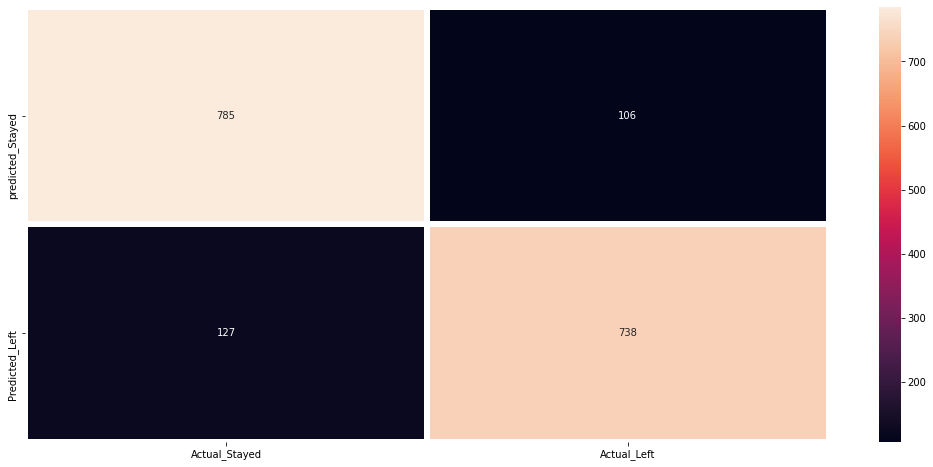

In [140]:
# Confusion Matrix

confusion_matrix=confusion_matrix(y_test,predicted)

fig = plt.figure(figsize=(18,8))
sns.heatmap(confusion_matrix.T,annot=True,fmt = 'd',xticklabels=['Actual_Stayed','Actual_Left'],
            yticklabels=["predicted_Stayed","Predicted_Left"],annot_kws={'fontsize':10},linewidths=5)

In [141]:
# All Scores

# roc_auc_score

print("roc_auc_score : ",roc_auc_score(y_test,predicted),'\n')

print(classification_report(y_test,predicted))


roc_auc_score :  0.8675765984867382 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       912
           1       0.85      0.87      0.86       844

    accuracy                           0.87      1756
   macro avg       0.87      0.87      0.87      1756
weighted avg       0.87      0.87      0.87      1756



In [142]:
# Cross Validation report

print("Precision : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='precision').mean())
print("Recall : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='recall').mean())
print("F1 : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='f1').mean())
print("Accuracy : ",cross_val_score(Random_forest_model,X_sample,y_sample,cv=10,scoring='accuracy').mean())

Precision :  0.8633412141079674
Recall :  0.8441913439635534
F1 :  0.8447594124931503
Accuracy :  0.858412791588637


In [56]:
import os